# run_201807120647

少量のデータで過学習を確認できたので、本物のSQuADデータで学習をしてみた。元論文によると150Kステップまで学習していたが、今回は動作を確認したいだけだったので、凡そ50Kステップ学習してみた(約16時間)。

結果はtrainに対して過学習が確認できた。次は正則化を導入していく。

未実装の正則化一覧:

* L2 weight decay
* 層間のドロップアウト
* layer dropout

正則化以外の未実装項目一覧：

* learning rate warm-up
* EMA

---

## 結果の詳細

* commit: 4f6db6814c271ae3492f2629f232b071be1952b8
* 前処理済データ： [preprocessed_fix_201805220440.tar.gz](https://s3.amazonaws.com/taiwa-eqa/qanet/preprocessed_fix_201805220440.tar.gz)

ハイパーパラメータ：

In [1]:
import json

with open('./logs/201807120647/hparams.json') as f:
    print(json.dumps(json.load(f), indent=2))

{
  "model_encoder_num_blocks": 7,
  "char_dim": 200,
  "max_word_length": 16,
  "highway_num_layers": 2,
  "char_vocab_size": 208,
  "batch_size": 32,
  "embedding_encoder_filter_size": 7,
  "learning_rate": 0.001,
  "epochs": 100,
  "model_encoder_filter_size": 5,
  "embedding_encoder_num_heads": 1,
  "max_context_length": 400,
  "max_question_length": 30,
  "embedding_encoder_num_blocks": 1,
  "model_encoder_num_heads": 1,
  "dim": 128,
  "num_gpus": 2,
  "model_encoder_num_conv_layers": 2,
  "embedding_encoder_num_conv_layers": 4,
  "char_emb_dim": 8,
  "char_conv_filter_size": 5
}


dev-v1.1.jsonに対する評価結果：

```
{"f1": 31.795164306728, "exact_match": 21.116367076631978}
```

train-v1.1.jsonに対する評価結果

```
{"f1": 70.17270020797858, "exact_match": 58.16961380837681}
```

In [4]:
%matplotlib inline

import os
import sys

root_dir = os.path.join(os.getcwd(), "..", "../")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from IPython.core.pylabtools import figsize
from plot_util import plot_perplexity

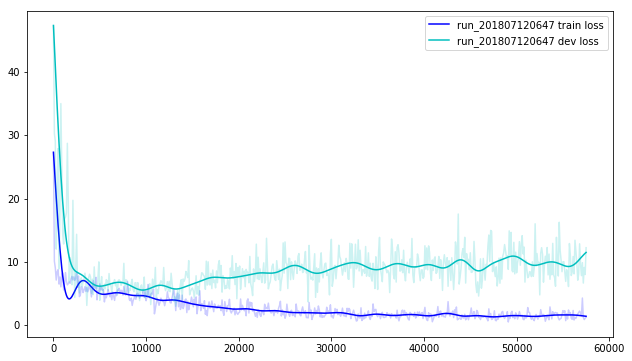

In [5]:
figsize(10.5, 6)

plot_perplexity(
    ('run_201807120647 train loss', './logs/201807120647/run_201807120647_train_loss.csv'),
    ('run_201807120647 dev loss', './logs/201807120647/run_201807120647_dev_loss.csv'),
    log=False)

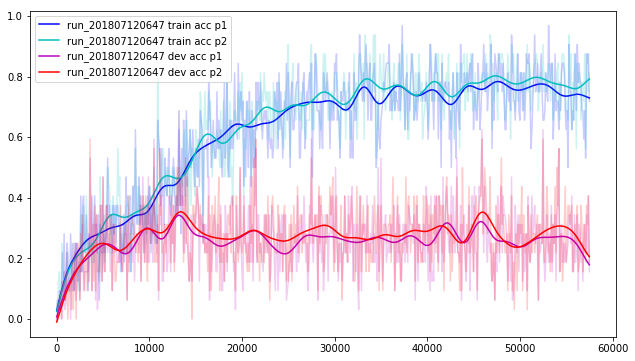

In [6]:
plot_perplexity(
    ('run_201807120647 train acc p1', './logs/201807120647/run_201807120647_train_acc_p1.csv'),
    ('run_201807120647 train acc p2', './logs/201807120647/run_201807120647_train_acc_p2.csv'),
    ('run_201807120647 dev acc p1', './logs/201807120647/run_201807120647_dev_acc_p1.csv'),
    ('run_201807120647 dev acc p2', './logs/201807120647/run_201807120647_dev_acc_p2.csv'),
    log=False)